In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("/Users/dineshdhakar/Desktop/OneDrive/medilabs/Hospital Data/hospital list of states with cities.xls")

In [3]:
data

Hospital Name  \
0                            Janatha Hospital   
1     Konaseema Ins of Medical Sciences(KIMS)   
2                         United Nursing Home   
3                            V.N.Nursing Home   
4           Chandra Super Speciality Hospital   
...                                       ...   
5347        North Bengal Neuro Centre Pvt Ltd   
5348               Paramount Hospital Pvt.Ltd   
5349      Siliguri Greater Lions Eye Hospital   
5350             SUNRISE NURSING HOME PVT.LTD   
5351                      MAMATA NURSING HOME   

                                                  Addr1  Addr2  Addr3  \
0                                          Mummidivaram    NaN    NaN   
1                                    NH-214, Amalapuram    NaN    NaN   
2           3-2-132, College road, Amalapuram, E.G.Dist    NaN    NaN   
3              D.No-3-2-117 E, College Road, Amalapuram    NaN    NaN   
4     No. 13-2-390, Shirdi Nagar, beside RTC bus sta...    NaN    NaN   
...                                                 ...    ...    ...   
5347                               Meghnath Saha Sarani    NaN    NaN   
5348                      Mangal Pandey Road, Khalpara,    NaN    NaN   
5349         2nd mile sevoke road, Behind vishal cinema    NaN    NaN   
5350              UDHAM SING SARANI,SEVOK ROAD,SILIGURI    NaN    NaN   
5351                               DHARPUR,PO&PS TAMLUK    NaN    NaN   

            City   Pincode           State                      Phone  \
0     Amalapuram  533216.0  Andhra Pradesh             08856 - 272291   
1     Amalapuram  533201.0  Andhra Pradesh             08856 - 237996   
2     Amalapuram  533201.0  Andhra Pradesh             08856 - 231346   
3     Amalapuram  533201.0  Andhra Pradesh             08856 - 231166   
4      Anantapur  515001.0  Andhra Pradesh                8554-232123   
...          ...       ...             ...                        ...   
5347    Siliguri  734003.0     West Bengal               0353-2511122   
5348    Siliguri  734005.0     West Bengal             0353 - 2500112   
5349    Siliguri  734002.0     West Bengal       0353-2543457/2643301   
5350    Siliguri  734001.0     West Bengal  0353 - 2643-692 / 2531369   
5351      TAMLUK  721636.0     West Bengal             03228 - 266329   

          Fax  Description  
0      271191          NaN  
1      237985          NaN  
2         NaN          NaN  
3      232133          NaN  
4      275999          NaN  
...       ...          ...  
5347  2515273          NaN  
5348  2500052          NaN  
5349  2545741          NaN  
5350  2531342          NaN  
5351   270196          NaN  

[5352 rows x 10 columns]

In [48]:
banglore=pd.read_excel("/Users/dineshdhakar/Desktop/OneDrive/medilabs/Hospital Data/banglore/linked_labs_distwise_banglore_all.xlsx")

In [38]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.firefox.options import Options as FirefoxOptions

# configure Chrome Webdriver
path_Chrome="/Users/dineshdhakar/PycharmProjects/untitled/venv/chromedriver"
chrome_options = ChromeOptions()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(executable_path=path_Chrome, options = chrome_options)


# configure Firefox Driver

# path_Firefox="/Users/dineshdhakar/Downloads/geckodriver"
# firefox_options = FirefoxOptions()
# firefox_options.add_argument("--headless")
# driver = webdriver.Firefox(executable_path =path_Firefox, options = firefox_options)


In [49]:
banglore.columns

Index([   'Unnamed: 0',         'index', 'Hospital Name',         'Addr1',
               'Addr2',         'Addr3',          'City',       'Pincode',
               'State',         'Phone',           'Fax',   'Description',
            'pincodes',              12,              13,              14,
                    15,              16,              17,              18,
                    19,              20,              21,              22,
                    23,              24,              25,              26,
                    27,              28,              29,              30,
                    31,              32,              33,              34,
                    35,              36,              37,              38,
                    39,              40,              41,              42,
                    43,              44,              45,              46,
                    47,              48,              49,              50,
                    51,  

In [60]:
if 'Unnamed: 0' in banglore.columns:
    banglore.drop(['Unnamed: 0'],axis=1,inplace=True)
else :
    print("wasnt there")

wasnt there


improvement in code:

pincode

multiple drivers

list by distance

result give address too

maps link to verify result


In [53]:
import re 

In [55]:
var=f"diagnostic labs near hosp(this is it)"
var=re.sub("[\(\[].*?[\)\]]", "", var)
var=var.replace(" ","+")
var

'diagnostic+labs+near+hosp'

In [62]:
def list(hosp):
    
    search_url="https://www.google.com/maps/search/"
    var=f"diagnostic labs near {hosp}"
    var=re.sub("[\(\[].*?[\)\]]", "", var)
    var=var.replace(" ","+")
    url=f"{search_url}{var}"
    driver.get(f"{url}")
    res=driver.find_elements_by_class_name("section-result-title")
    add=driver.find_elements_by_class_name("section-result-location")
    print(driver.page_source)

       
    banglore.at[i,12]= len(res)
    banglore.at[i,13]= url
    print(f"hospital {i+1}",f"{len(res)} results",url)
    
    for j in range(0,len(res)):
        banglore.at[i,14+2*j]=res[j].text
        banglore.at[i,14+2*j+1]=add[j].text
    
   

In [61]:
sums=0
for i in range(70,386):
    if banglore.at[i,12]<6:
        sums=sums+1
sums

42

<html itemscope="" itemtype="http://schema.org/Place" lang="en-IN" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>  Google Maps  </title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Diagnostic labs near near akshara eye hospital" itemprop="name"> <meta content="Diagnostic labs near near akshara eye hospital" property="og:title"> <meta content="https://maps.google.com/maps/api/staticmap?center=12.89365835%2C77.64216165&amp;zoom=11&amp;size=200x200&amp;markers=12.8990589%2C77.6055376%7C12.9048396%2C77.5855489%7C12.9057382%2C77.6058068%7C12.922071%2C77.6102
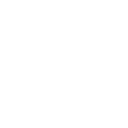
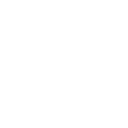

<html itemscope="" itemtype="http://schema.org/Place" lang="en-IN" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>Amar Nursing Home - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Google Maps" itemprop="name"> <meta content="Google Maps" property="og:title"> <meta content="https://maps.google.com/maps/api/staticmap?center=19.2117547%2C72.8521929&amp;zoom=17&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=XjmjBNWWshtVhiAR4jZNsMCKttY" itemprop="image"> <meta content="https://maps.google.com/
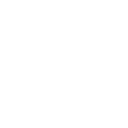
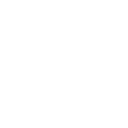

<html itemscope="" itemtype="http://schema.org/Place" lang="en-IN" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>diagnostic labs near Apurva Mother And Child Hospital - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Google Maps" itemprop="name"> <meta content="Google Maps" property="og:title"> <meta content="//www.gstatic.com/images/branding/product/1x/maps_round_512dp.png" itemprop="image"> <meta content="//www.gstatic.com/images/branding/product/1x/maps_round_512dp.png" property="og:image"> <meta content="256" property="og:image:width
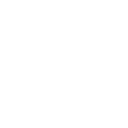
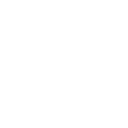

<html itemscope="" itemtype="http://schema.org/Place" lang="en-IN" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>diagnostic labs near Aveksha hospital - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Google Maps" itemprop="name"> <meta content="Google Maps" property="og:title"> <meta content="https://maps.google.com/maps/api/staticmap?center=13.081756%2C77.540929&amp;zoom=17&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=TD42XJ17tFBJK-HcmGqYUeoKmuo" itemprop="image"> <meta content="https:
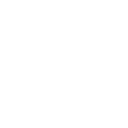
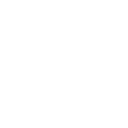

<html itemscope="" itemtype="http://schema.org/Place" lang="en-IN" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>  Google Maps  </title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Diagnostic labs near bangalore nethralaya" itemprop="name"> <meta content="Diagnostic labs near bangalore nethralaya" property="og:title"> <meta content="https://maps.google.com/maps/api/staticmap?center=12.9169587%2C77.67389095&amp;zoom=9&amp;size=200x200&amp;markers=12.927237%2C77.5650001%7C13.0246256%2C77.6443622%7C12.9611892%2C77.5272376%7C12.9253898%2C77.5698194%7C13.011
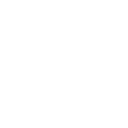
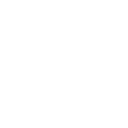

<html itemscope="" itemtype="http://schema.org/Place" lang="en-IN" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>diagnostic labs near BGS-GLOBAL HOSPITAL - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Google Maps" itemprop="name"> <meta content="Google Maps" property="og:title"> <meta content="//www.gstatic.com/images/branding/product/1x/maps_round_512dp.png" itemprop="image"> <meta content="//www.gstatic.com/images/branding/product/1x/maps_round_512dp.png" property="og:image"> <meta content="256" property="og:image:width"> <meta cont
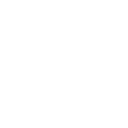
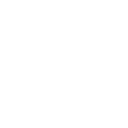

KeyboardInterrupt: 

In [63]:
for i in range(0,386):
    
    if banglore.at[i,12]<6:
        list(banglore.loc[i,"Hospital Name"])
    
    

In [ ]:
import pprint
search_url="https://www.google.com/maps/search/"
var=f"diagnostic labs near TR Hospital"
var=var.replace(" ","+")
url=f"{search_url}{var}"
driver.get(f"{url}")
print(url)
name=driver.find_elements_by_class_name("section-result-title-container"")
print(len(name))


In [46]:
labs_in_banglore=banglore.copy()

In [47]:
labs_in_banglore.to_excel("/Users/dineshdhakar/Desktop/OneDrive/medilabs/Hospital Data/banglore/linked_labs_distwise_banglore_all.xlsx")

In [ ]:
#labs_dist.to_csv("/Users/dineshdhakar/Desktop/OneDrive/medilabs/Hospital Data/banglore/linked_labs_distwise_banglore_version_2.csv")

In [ ]:
sums=0
for i in range(len(banglore)):
    if banglore.at[i,12]<10:
        sums=sums+1
print(sums)        

In [ ]:
banglore.head(77).T

In [2]:
from lxml.html import fromstring
import requests
from itertools import cycle
import traceback






In [ ]:
#If you are copy pasting proxy ips, put in the list below
proxies = ['157.65.25.144:3128', '64.137.176.32:3128', '167.179.4.142:55443']

proxy_pool = cycle(proxies)

url = 'https://www.google.co.in'
for i in range(1,3):
    #Get a proxy from the pool
    proxy = next(proxy_pool)
    print(proxy)
    print("Request #%d"%i)
    try:
        response = requests.get(url)
        print(response.json())
    except:
        #Most free proxies will often get connection errors. You will have retry the entire request using another proxy to work. 
        #We will just skip retries as its beyond the scope of this tutorial and we are only downloading a single url 
        print("Skipping. Connnection error")

In [ ]:
def get_proxies():
    url = 'https://free-proxy-list.net/'
    response = requests.get(url)
    parser = fromstring(response.text)
    proxies = set()
    for i in parser.xpath('//tbody/tr')[:10]:
        if i.xpath('.//td[7][contains(text(),"yes")]'):
            proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
            proxies.add(proxy)
    return proxies